In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


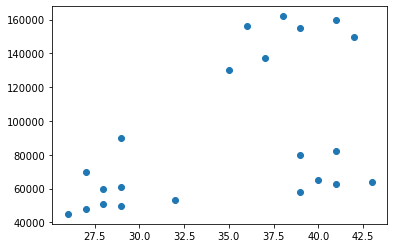

In [3]:
plt.scatter(df.Age,df["Income($)"])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_pred = km.fit_predict(df.drop("Name", axis=1))
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df["cluster"] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


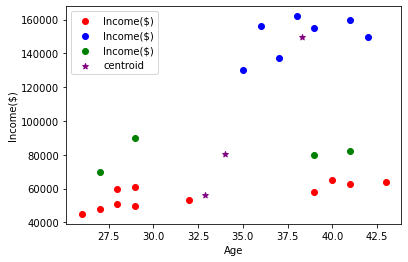

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1["Income($)"], color="r", label="Income($)")
plt.scatter(df2.Age,df2["Income($)"], color="b", label="Income($)")
plt.scatter(df3.Age,df3["Income($)"], color="g", label="Income($)")
plt.scatter(km.cluster_centers_[:,0],  km.cluster_centers_[:,1], color="purple", marker="*", label="centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [8]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [9]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[["Age","Income($)"]])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [10]:
df["cluster"] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


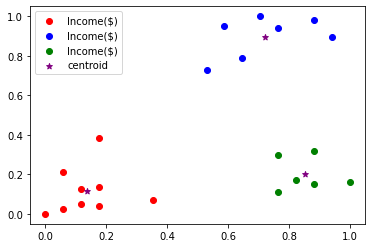

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1["Age"],df1["Income($)"], color="r", label="Income($)")
plt.scatter(df2["Age"],df2["Income($)"], color="b", label="Income($)")
plt.scatter(df3["Age"],df3["Income($)"], color="g", label="Income($)")

plt.scatter(km.cluster_centers_[:,0],  km.cluster_centers_[:,1], color="purple", marker="*", label="centroid")

plt.legend()

In [12]:
k_range = range(1,10)
sse = []
for k in k_range:
    km =KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

C:\Users\OWNER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.22020960864009398,
 0.18134819254950574,
 0.13265419827245162,
 0.10188787724979426]

Text(0, 0.5, 'sum of square error')

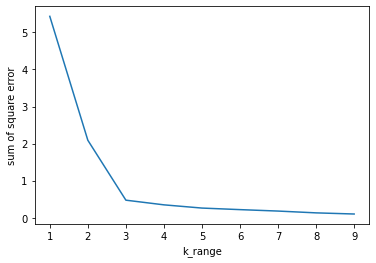

In [14]:
plt.plot(k_range,sse)
plt.xlabel("k_range")
plt.ylabel("sum of square error")